#**PCA**

This code does the following:

- Loads the California housing dataset.
- Splits the dataset into training and testing sets.
- Scales the features.
- Applies PCA to retain features that explain at least 80% of the variance.
- Trains linear regression models using original features, PCA features, and a combination of both.
- Evaluates and compares the performance of each model by plotting the actual vs. predicted values.
- Visualizes the PCA components and the variance explained by each.

Shape of X: (20640, 8)
MSE for original features model: 0.5558915986952442
MSE for PCA features model: 0.7431025684653442
MSE for combined features model: 0.5555279200138434


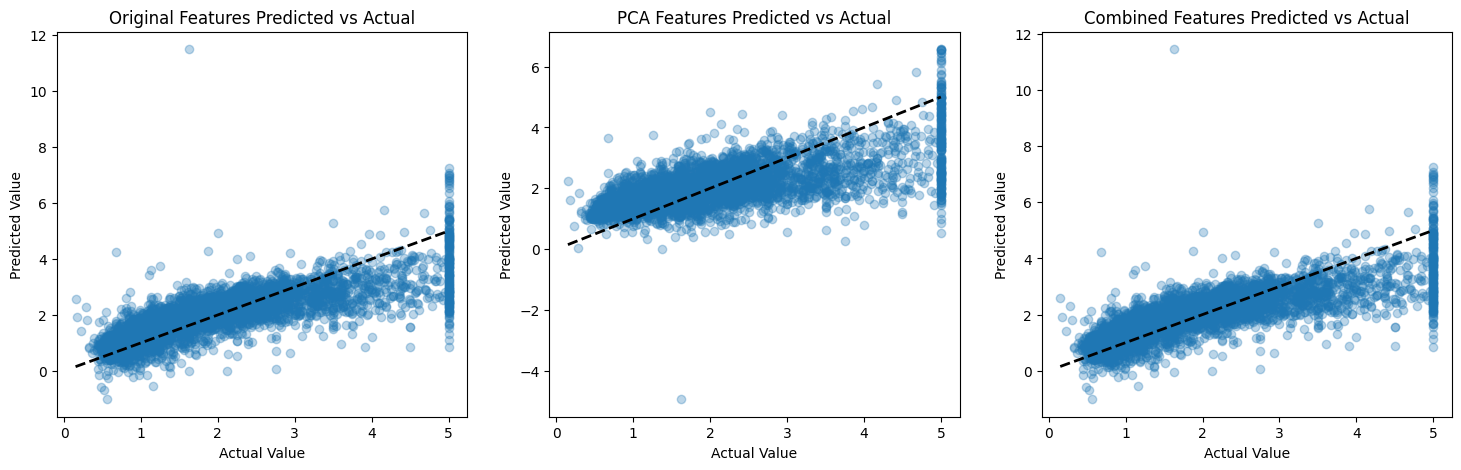

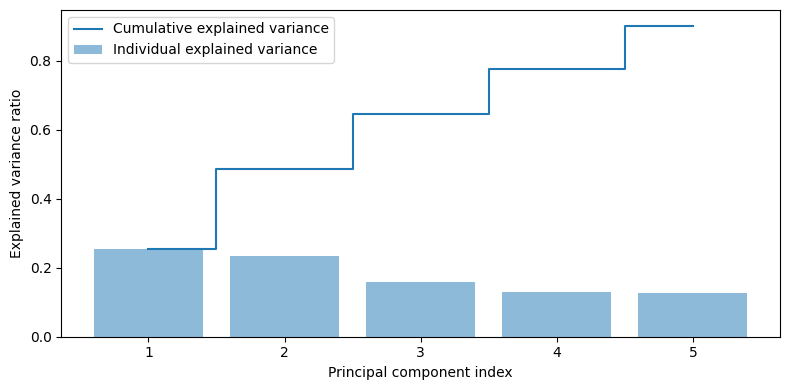

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Print shape of original data
print("Shape of X:",X.shape)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to retain features that explain at least 90% of the variance
pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train model using original features
model_original = LinearRegression()
model_original.fit(X_train_scaled, y_train)
y_pred_original = model_original.predict(X_test_scaled)

# Train model using PCA features
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

# Train model using both original and PCA features
X_train_combined = np.hstack((X_train_scaled, X_train_pca))
X_test_combined = np.hstack((X_test_scaled, X_test_pca))
model_combined = LinearRegression()
model_combined.fit(X_train_combined, y_train)
y_pred_combined = model_combined.predict(X_test_combined)

from sklearn.metrics import mean_squared_error

# After training the models and making predictions as shown in the previous script:

# Calculate and print MSE for the model using original features
mse_original = mean_squared_error(y_test, y_pred_original)
print(f'MSE for original features model: {mse_original}')

# Calculate and print MSE for the model using PCA features
mse_pca = mean_squared_error(y_test, y_pred_pca)
print(f'MSE for PCA features model: {mse_pca}')

# Calculate and print MSE for the model using combined features
mse_combined = mean_squared_error(y_test, y_pred_combined)
print(f'MSE for combined features model: {mse_combined}')


# Evaluation and comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Original Features', 'PCA Features', 'Combined Features']
predictions = [y_pred_original, y_pred_pca, y_pred_combined]

for ax, title, y_pred in zip(axes, titles, predictions):
    ax.scatter(y_test, y_pred, alpha=0.3)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax.set_title(f'{title} Predicted vs Actual')
    ax.set_xlabel('Actual Value')
    ax.set_ylabel('Predicted Value')

# Plotting PCA components and variance explained
plt.figure(figsize=(8, 4))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
